## **Import necessary libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Load Dataset**


In [3]:
df = pd.read_csv('FP_DATASET_Fullcut2.csv')

## **2. Check the initial data overview**

In [23]:
df

,NO,RSSI1,RSSI2,RSSI3,RSSI4,RSSI5,RSSI6,TARGET
0,1,-72,-71,-74,-72,-89,-74,31
1,2,-72,-77,-74,-71,-86,-78,31
2,3,-72,-79,-73,-72,-88,-75,31
3,4,-72,-78,-72,-72,-89,-73,31
4,5,-74,-80,-72,-72,-87,-75,31
...,...,...,...,...,...,...,...,...
9122,9123,-76,-71,-65,-69,-81,-71,21
9123,9124,-74,-72,-65,-69,-81,-63,21
9124,9125,-74,-72,-65,-70,-82,-70,21
9125,9126,-76,-72,-65,-70,-83,-70,21


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9127 entries, 0 to 9126
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NO      9127 non-null   int64
 1   RSSI1   9127 non-null   int64
 2   RSSI2   9127 non-null   int64
 3   RSSI3   9127 non-null   int64
 4   RSSI4   9127 non-null   int64
 5   RSSI5   9127 non-null   int64
 6   RSSI6   9127 non-null   int64
 7   TARGET  9127 non-null   int64
dtypes: int64(8)
memory usage: 570.6 KB
None


In [6]:
print(df.describe())

                NO        RSSI1        RSSI2        RSSI3        RSSI4  \
count  9127.000000  9127.000000  9127.000000  9127.000000  9127.000000   
mean   4564.000000   -72.789964   -72.890216   -69.692341   -72.366605   
std    2634.882287     4.843647     5.836305     6.778096     5.789947   
min       1.000000   -94.000000   -97.000000   -98.000000   -98.000000   
25%    2282.500000   -76.000000   -76.000000   -74.000000   -74.000000   
50%    4564.000000   -72.000000   -73.000000   -69.000000   -71.000000   
75%    6845.500000   -70.000000   -70.000000   -65.000000   -69.000000   
max    9127.000000   -59.000000   -56.000000   -54.000000   -58.000000   

             RSSI5        RSSI6       TARGET  
count  9127.000000  9127.000000  9127.000000  
mean    -81.135094   -70.277309    37.264161  
std       4.314814     5.427698    16.971319  
min     -99.000000   -99.000000    11.000000  
25%     -84.000000   -73.000000    22.000000  
50%     -81.000000   -70.000000    41.000000  
75% 

## **3. Handle missing values**

In [7]:
# Check for missing values
print(df.isnull().sum())

NO        0
RSSI1     0
RSSI2     0
RSSI3     0
RSSI4     0
RSSI5     0
RSSI6     0
TARGET    0
dtype: int64


In [8]:
# Replace missing values (example: using mean)
df.fillna(df.mean(), inplace=True)

## **4. Separate features and target variable**

In [9]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [10]:
X

,NO,RSSI1,RSSI2,RSSI3,RSSI4,RSSI5,RSSI6
0,1,-72,-71,-74,-72,-89,-74
1,2,-72,-77,-74,-71,-86,-78
2,3,-72,-79,-73,-72,-88,-75
3,4,-72,-78,-72,-72,-89,-73
4,5,-74,-80,-72,-72,-87,-75
...,...,...,...,...,...,...,...
9122,9123,-76,-71,-65,-69,-81,-71
9123,9124,-74,-72,-65,-69,-81,-63
9124,9125,-74,-72,-65,-70,-82,-70
9125,9126,-76,-72,-65,-70,-83,-70


In [11]:
y

,TARGET
0,31
1,31
2,31
3,31
4,31
...,...
9122,21
9123,21
9124,21
9125,21


## **5. Split the data**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,NO,RSSI1,RSSI2,RSSI3,RSSI4,RSSI5,RSSI6
4339,4340,-71,-74,-73,-70,-87,-64
9055,9056,-75,-72,-65,-69,-82,-70
5856,5857,-86,-83,-63,-70,-76,-67
3412,3413,-64,-74,-74,-71,-78,-67
6194,6195,-77,-80,-58,-67,-83,-71
...,...,...,...,...,...,...,...
5734,5735,-75,-84,-64,-71,-78,-68
5191,5192,-71,-69,-73,-71,-81,-60
5390,5391,-70,-71,-80,-69,-80,-62
860,861,-70,-79,-59,-82,-82,-73


In [14]:
X_test

,NO,RSSI1,RSSI2,RSSI3,RSSI4,RSSI5,RSSI6
3107,3108,-67,-78,-75,-77,-79,-69
3567,3568,-73,-68,-84,-70,-86,-69
3133,3134,-68,-73,-74,-77,-78,-70
3317,3318,-61,-78,-71,-71,-81,-72
8424,8425,-74,-72,-77,-71,-88,-63
...,...,...,...,...,...,...,...
181,182,-72,-77,-77,-70,-86,-72
1618,1619,-73,-65,-68,-73,-80,-72
7388,7389,-71,-73,-68,-65,-81,-79
7698,7699,-81,-73,-65,-69,-80,-67


In [15]:
y_train

,TARGET
4339,41
9055,21
5856,32
3412,62
6194,22
...,...
5734,32
5191,42
5390,42
860,11


In [16]:
y_test

,TARGET
3107,62
3567,61
3133,62
3317,62
8424,13
...,...
181,31
1618,43
7388,33
7698,23


## **6. Create KNN model**

In [17]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## **7. Make predictions**

In [18]:
y_pred = model.predict(X_test)

## **8. Evaluate the model**

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [20]:
# Display Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          11       1.00      1.00      1.00        81
          12       1.00      1.00      1.00       103
          13       1.00      1.00      1.00       101
          21       1.00      1.00      1.00       101
          22       1.00      1.00      1.00       109
          23       1.00      1.00      1.00       102
          31       1.00      1.00      1.00       112
          32       1.00      1.00      1.00        96
          33       1.00      1.00      1.00        99
          41       1.00      1.00      1.00       100
          42       1.00      1.00      1.00       111
          43       1.00      1.00      1.00       109
          51       1.00      1.00      1.00       107
          52       1.00      1.00      1.00       105
          53       1.00      1.00      1.00        93
          61       1.00      1.00      1.00        92
          62       1.00      1.00      1.00       101
          63       1.00    

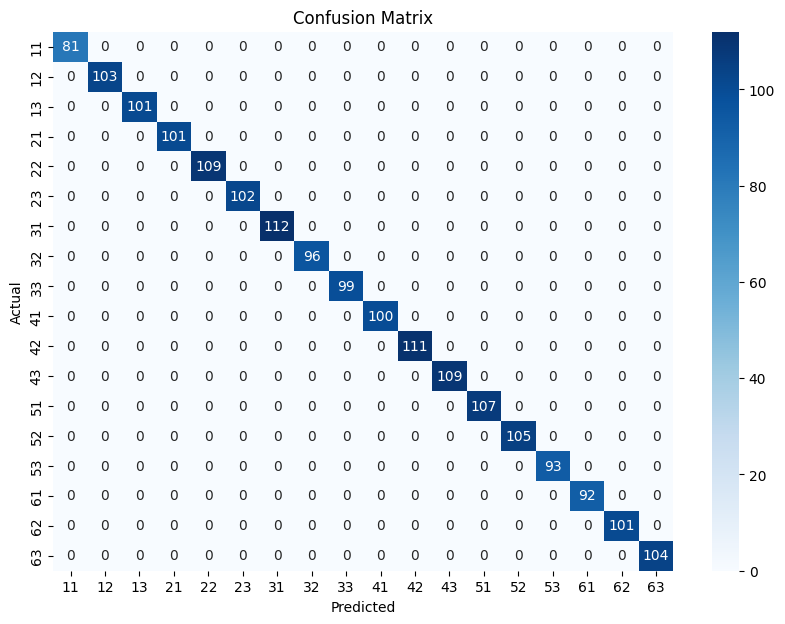

In [21]:
# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## **9. Test different values of K**

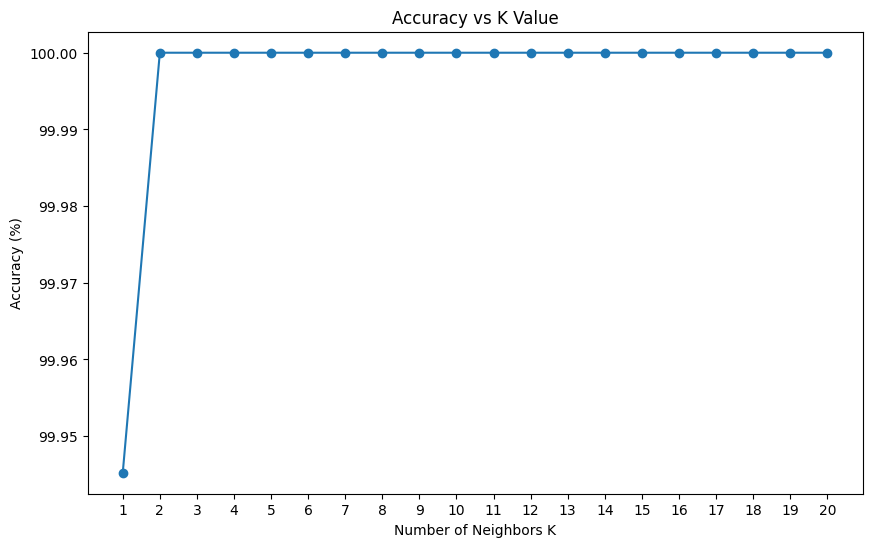

In [22]:
accuracy_list = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

# Display the accuracy vs K Value graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, [acc * 100 for acc in accuracy_list], marker='o')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs K Value')
plt.show()